# MNIST dataset --- Shallow Net

<span style="color:red;">Aims:</span><br>
    1-Learn how to Import DataSets from Keras<br>
    2-Understanding of Sequence Model<br>
    3-Understanding of Dense Layer<br>
    4-The Difference between SGD and adam Optimizer<br>

### Loading Dependencies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Loading Data

In [2]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

### Exploring Data

In [3]:
print("X_train Shape:",X_train.shape)
print("Y_test Shape:",Y_train.shape)
print("X_test Shape:",X_test.shape)
print("Y_test Shape:",X_test.shape)

X_train Shape: (60000, 28, 28)
Y_test Shape: (60000,)
X_test Shape: (10000, 28, 28)
Y_test Shape: (10000, 28, 28)


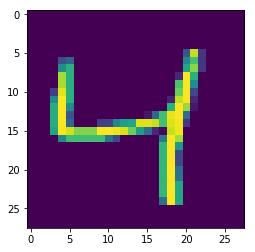

In [4]:
plt.imshow(X_train[2])

In [5]:
print(Y_train[2])

4


In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [7]:
n_classes = 10
Y_train = keras.utils.to_categorical(Y_train,n_classes)
Y_test = keras.utils.to_categorical(Y_test, n_classes)

### Creating the Model

In [8]:
model = Sequential()
model.add(Dense((64), activation="sigmoid", input_shape=(784,)))
model.add(Dense((10), activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Configuring the model

In [9]:
model.compile(loss="mean_squared_error", optimizer="Adam", metrics=["accuracy"])

### Training The Model

In [10]:
model.fit(X_train,Y_train, batch_size=128, epochs=20, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0324 - acc: 0.7952 - val_loss: 0.0183 - val_acc: 0.8922
Epoch 2/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.0169 - acc: 0.8960 - val_loss: 0.0150 - val_acc: 0.9089
Epoch 3/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0151 - acc: 0.9062 - val_loss: 0.0132 - val_acc: 0.9171
Epoch 4/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0137 - acc: 0.9140 - val_loss: 0.0131 - val_acc: 0.9172
Epoch 5/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.0135 - acc: 0.9138 - val_loss: 0.0129 - val_acc: 0.9185
Epoch 6/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.0127 - acc: 0.9191 - val_loss: 0.0119 - val_acc: 0.9254
Epoch 7/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0120 - acc: 0.9240 - val_loss: 0.0114 - val_acc

### Checking Model Prediction

In [11]:
Prediction = model.predict([[X_train[2]]])
print(Prediction)

[[4.7849346e-04 1.8454710e-04 8.0312714e-03 5.1113926e-03 6.0758018e-01
  4.4064177e-03 2.2131629e-02 1.3112660e-02 1.1423613e-02 3.2753974e-01]]


In [12]:
max_num = Prediction.max()
Prediction = Prediction.tolist()
x = 0;
Prediction = Prediction[0]
for items in Prediction:
    if(items==max_num):
        break;
    x+=1
print(x)

4
